In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seqm
plt.style.use('dark_background')

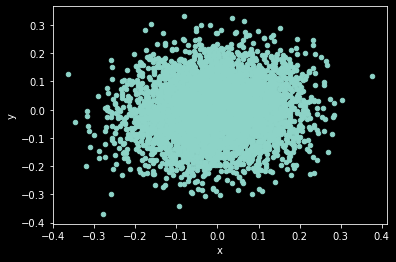

,x,y
2000-01-01,-0.020305,0.054647
2000-01-02,-0.009097,0.220504
2000-01-03,-0.064543,0.133174
2000-01-04,0.082144,0.022466
2000-01-05,-0.065127,-0.062489
...,...,...
2013-09-04,-0.059753,0.042410
2013-09-05,0.025541,-0.017183
2013-09-06,0.094295,0.063757
2013-09-07,-0.125651,0.047299


In [20]:

# create a dataset
n = 5000
s = 0.1
x = np.random.normal(0, s, n)
y = np.random.normal(0.1*x, s, n)

data = pd.DataFrame()
data['x'] = x
data['y'] = y
data.index = pd.date_range('2000-01-01', periods = n, freq = 'D')
data.plot.scatter('x','y')
plt.show()
data

In [21]:
# create dataset object
dataset = seqm.Dataset({'data' : data})

In [22]:
# create model pipe
model_pipes = seqm.ModelPipes()
for key in dataset.keys():
    # instantiate a model
    # ConditionalGaussian: lin reg
    # GaussianHMM
    # ConditionalGaussianHMM
    model = seqm.ConditionalGaussian(kelly_std=2, max_w=1)
    # create a pipe for data
    model_pipe_ = seqm.ModelPipe(model = model)
    # store pipe in pipes
    model_pipes[key] = model_pipe_

In [23]:
paths=dataset.cvbt(
                model_pipes = model_pipes, 
                k_folds = 4, 
                seq_path = False, 
                start_fold = 0, 
                n_paths = 10, 
                burn_fraction = 0.1, 
                min_burn_points = 3 
                )

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  3.69it/s]


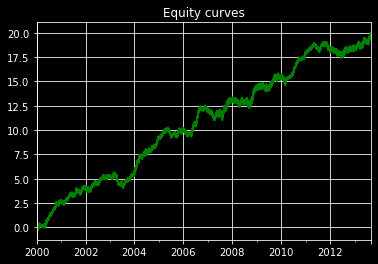

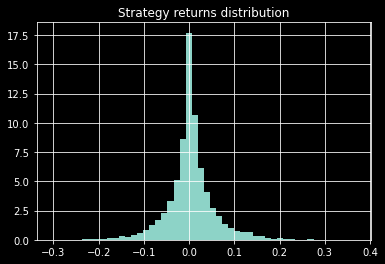

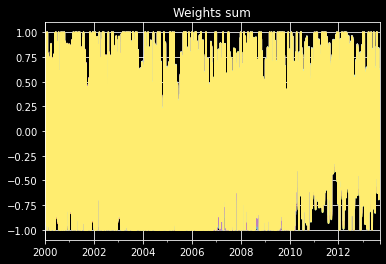

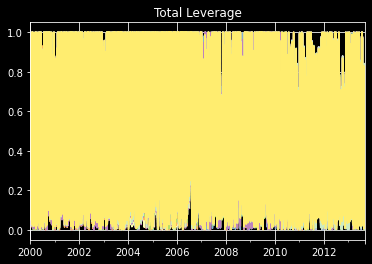


** ACCEPT STRATEGY **


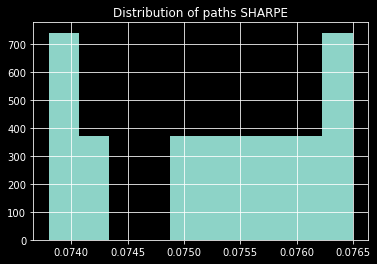

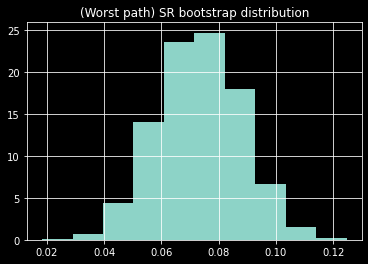


** PERFORMANCE SUMMARY **

Return:  0.003958566102531468
Standard deviation:  0.05258813497846149
Sharpe:  0.07527489050814935



In [24]:
seqm.post_process(paths)
